L'objectif est de comparer trois graphes:
 - Le premier est la valeur des angles labellisés au cours des frames
 - Le second est la valeur prédite des angles au cours des frames
 - Le troisième est la valeur des angles selon une simple régression linéaire sur les X dernières valeurs

Lecture des images de records_good/

In [1]:
import os
import md
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import preprocess

Using TensorFlow backend.


In [2]:
data_dir = "./records_good/"

X = [f for f in os.listdir(data_dir) if
       os.path.isfile(os.path.join(data_dir, f)) and
       (cv2.imread(os.path.join(data_dir, f)) is not None) ]
y = [(int(f.split("_")[1]), float(f.split("_")[5].split(".j")[0])) for f in X]

print(X[0])
print(y[0])

frame_1827_gas_0.4_dir_-0.041257647385984426.jpg
(1827, -0.041257647385984426)


Récupération des données pour les tracés

In [3]:
# Graphe 1
y = sorted(y, key=(lambda x: x[0]))
g1_time = [x[0] for x in y]
g1_angle = [x[1] for x in y]

In [25]:
# Graphe 2
mod = md.build_model()
mod.load_weights('../models/model-0,0YUV.h5')
x = [(int(x.split("_")[1]), data_dir + x) for x in X]
x = sorted(x, key=(lambda l: l[0]))
x = [l[1] for l in x]

imgs = [img for img in map(cv2.imread, x)]
imgs = [img for img, _ in map(preprocess.preprocess, imgs)]
preds = mod.predict(np.array(imgs))


/home/cai/scia_project/car_repo/speed_prediction/md.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", strides=(2, 2))`
  model.add(Conv2D(24, 5, 5, activation='elu', subsample=(2, 2)))
/home/cai/scia_project/car_repo/speed_prediction/md.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  model.add(Conv2D(36, 5, 5, activation='elu', subsample=(2, 2)))
/home/cai/scia_project/car_repo/speed_prediction/md.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  model.add(Conv2D(48, 5, 5, activation='elu', subsample=(2, 2)))
/home/cai/scia_project/car_repo/speed_prediction/md.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  model.add(Conv2D(64, 3, 3, activation='elu'))
/home/cai/scia_project/car_repo/speed_prediction/md.py:24: UserWarning: Update

Affichage des graphes: En rouge le graphe 1, en vert le graphe 2 et en bleu le graphe 3.

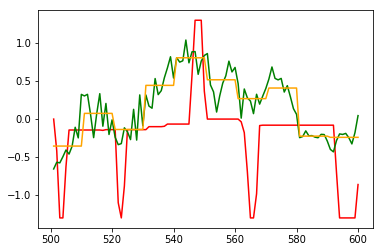

In [58]:
range_inf, range_sup = 500, 600
# nb frame per group is (sup - inf) / nb_group
nb_group = 10

plt.plot(g1_time[range_inf:range_sup], g1_angle[range_inf:range_sup], c='red')
plt.plot(g1_time[range_inf:range_sup], preds[range_inf:range_sup], c='green')
cut = np.split(np.asarray(preds[range_inf:range_sup]), nb_group)

# fonction escalier
p_stair = np.array([np.ones((range_sup - range_inf) // nb_group) * np.mean(x) for x in cut]).flatten()
plt.plot(g1_time[range_inf:range_sup], p_stair, c='orange')

plt.show()